In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import beta
sns.set(style='whitegrid', font_scale=1.6)

%matplotlib inline

In [4]:
def PlotForPeriod(period_num):
    GetAverageInfo(period_num)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(range(6), average_rice, color = 'red', linewidth = 10, label = 'average_rice')
    ax.scatter(range(6), average_meat, color = 'blue', linewidth = 10, label = "average_meat")  
    ax.set_title(label = 'Period № {0}'.format(period_num))
    ax.set_ylabel(ylabel = 'Price')
    plt.legend()
    plt.plot()

In [5]:
def GetAverageInfo(df, period_num):
    average_rice = df['player.x_rice'].mean()
    max_rice = df['player.max_rice'].mean()
    average_meat = df['player.x_meat'].mean()
    
    price_rice = df['group.p_rice'].mean()
    price_meat = df['group.p_meat'].mean()
    return average_rice, average_meat, price_rice, price_meat, max_rice

In [40]:
def PlotForPlayer(df, player, giffen_with_real):
    person_data = df.loc[(df['participant.id_in_session'] == player)]
    period = person_data['subsession.round_number'].values
    amount_rice = person_data['player.x_rice'].values
    amount_meat = person_data['player.x_meat'].values
    utility = person_data['player.utility'].values
    
    if giffen_with_real > 0:
        amount_real = person_data['player.x_rice_actual'].values
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(period, amount_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax.plot(period, amount_meat,color = 'blue', linewidth = 3, label = 'x_meat')
    #ax.plot(period, utility,color = 'red', linewidth = 3, label = 'utility')
    
    if giffen_with_real > 0:
        ax.plot(period, amount_real,color = 'green', linewidth = 3, label = 'x_rice_actual')
        
    ax.set_title(label = 'Player № {0}'.format(player))
    #ax.set_ylabel(ylabel = 'Price')
    plt.legend(loc = 1)
    plt.plot()

In [ ]:
def PlotForGroup(df, player, giffen_with_real):
    person_data = df.loc[(df['participant.id_in_session'] == player)]
    period = person_data['subsession.round_number'].values
    amount_rice = person_data['player.x_rice'].values
    amount_meat = person_data['player.x_meat'].values
    utility = person_data['player.utility'].values
    
    if giffen_with_real > 0:
        amount_real = person_data['player.x_rice_actual'].values
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(period, amount_rice,color = 'green', ls = '--', linewidth = 3, label = 'x_rice')
    ax.plot(period, amount_meat,color = 'blue', linewidth = 3, label = 'x_meat')
    #ax.plot(period, utility,color = 'red', linewidth = 3, label = 'utility')
    
    if giffen_with_real > 0:
        ax.plot(period, amount_real,color = 'green', linewidth = 3, label = 'x_rice_actual')
        
    ax.set_title(label = 'Player № {0}'.format(player))
    #ax.set_ylabel(ylabel = 'Price')
    plt.legend(loc = 1)
    plt.plot()

##  Гиффен 0

In [7]:
data = pd.read_excel('Data_0.xlsx', sheet_name = 0)
description = pd.read_excel('Data_0.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data = data[usefull_cols].copy()

In [8]:
g0_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                      'round_6', 'round_7'])
g0_overall_info.loc[0, 'label'] = 'Average_rice'
g0_overall_info.loc[1, 'label'] = 'Average_meat'
g0_overall_info.loc[2, 'label'] = 'Price_rice'
g0_overall_info.loc[3, 'label'] = 'Price_meat'
g0_overall_info.loc[4, 'label'] = short_data.iloc[0:23]['participant.label'].values
g0_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_data = short_data.loc[(short_data['subsession.round_number'] == round_num)]

    g0_overall_info.iloc[0, round_num] = GetAverageInfo(period_data, round_num)[0] 
    g0_overall_info.iloc[1, round_num] = GetAverageInfo(period_data, round_num)[1] 
    g0_overall_info.iloc[2, round_num] = GetAverageInfo(period_data, round_num)[2] 
    g0_overall_info.iloc[3, round_num] = GetAverageInfo(period_data, round_num)[3]
    g0_overall_info.iloc[4, round_num] = period_data['player.payoff'].values
    g0_overall_info.iloc[5, round_num] = GetAverageInfo(period_data, round_num)[4]

[]

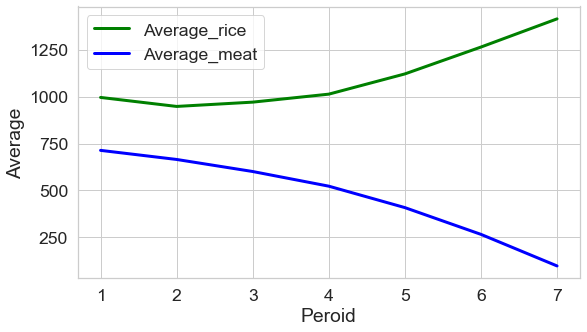

In [9]:
fig, ax = plt.subplots(1,figsize=(9, 5))

ax.plot(range(1, 8), g0_overall_info.iloc[0, 1:].values, color = 'green', linewidth = 3,  label = 'Average_rice')
ax.plot(range(1, 8), g0_overall_info.iloc[1, 1:].values, color = 'blue', linewidth = 3, label = 'Average_meat')

ax.set_ylabel(ylabel = 'Average')
ax.set_xlabel(xlabel = 'Peroid')

plt.legend()
plt.plot()


In [10]:
#fig, ax = plt.subplots(1, figsize=(9, 5))
#
#ax.plot(range(1, 8), overall_info.iloc[2, 1:].values, color = 'green', linewidth = 3, label = 'Price_rice')
#ax.plot(range(1, 8), overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')
#
#ax.set_ylabel(ylabel = 'Price')
#ax.set_xlabel(xlabel = 'Peroid')
#
#plt.legend()
#plt.plot()

[]

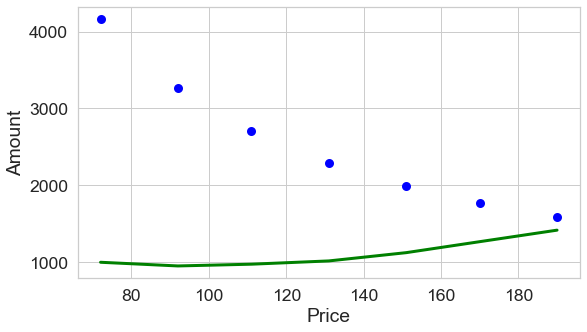

In [11]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g0_overall_info.iloc[2, 1:].values, g0_overall_info.iloc[0, 1:].values,color = 'green', linewidth = 3, label = 'Price_rice')
ax.scatter(g0_overall_info.iloc[2, 1:].values, g0_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Price_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')

ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

#plt.legend()
plt.plot()

1) добаить максимальное
2) цены убираем
3) от цены количество риса, x_rice

##   Гиффен 1

In [12]:
data1 = pd.read_excel('Data_1.xlsx', sheet_name = 0)
description1 = pd.read_excel('Data_1.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data1 = data1[usefull_cols].copy()

In [13]:
description1

,Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Таблица с общими результатами
0,participant.id_in_session,NaN,NaN,NaN,Номер игрока
1,participant.code,NaN,NaN,NaN,NaN
2,participant.label,NaN,NaN,NaN,NaN
3,participant._is_bot,NaN,NaN,NaN,-
4,participant.payoff,NaN,NaN,NaN,Общий выигрыш
5,player.id_in_group,NaN,NaN,NaN,Номер в общей группе
6,player.role,NaN,NaN,NaN,-
7,player.payoff,NaN,NaN,NaN,Выигрыш в этом периоде - исходный
8,player.x_rice,NaN,NaN,NaN,"Количество риса, заявленное на покупку игроком"
9,player.x_rice_d,NaN,NaN,NaN,"Количество риса, заявленное на покупку игроком..."


1) сравнение двух групп 
2)сравнить спрос  для каждой группы для каждого этапа (дельту для равновесия)
3) по каждому человеку во всех

In [14]:
short_data1

,participant.id_in_session,participant.label,participant.payoff,player.id_in_group,player.payoff,player.x_rice,player.x_rice_d,player.max_rice,player.x_meat,player.utility,player.utility_d,player.result,player.result_d,group.p_meat,group.p_rice,group.p_rice_d,group.eq_rice,subsession.round_number
0,1,NaN,150547,1,0,890.000000,890.00,4166.67,737.250000,0.000000,0.00,0.000000,0.00,320,72.0,72.0,889.656938,1
1,2,NaN,13060,2,0,890.000000,890.00,4166.67,737.250000,0.000000,0.00,0.000000,0.00,320,72.0,72.0,889.656938,1
2,3,NaN,281207,3,0,1200.000000,1200.00,4166.67,667.500000,0.000000,0.00,0.000000,0.00,320,72.0,72.0,889.656938,1
3,4,NaN,97988,4,0,356.000000,356.00,4166.67,857.400000,0.000000,0.00,0.000000,0.00,320,72.0,72.0,889.656938,1
4,5,NaN,32457,5,0,900.000000,900.00,4166.67,735.000000,0.000000,0.00,0.000000,0.00,320,72.0,72.0,889.656938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,19,NaN,25601,19,2811,1578.950000,1578.95,1578.95,0.000000,4.368815,4.37,28.108736,28.11,320,190.0,190.0,1393.869289,21
479,20,NaN,0,20,0,1385.000000,1385.00,1578.95,115.156250,0.000000,0.00,0.000000,0.00,320,190.0,190.0,1393.869289,21
480,21,NaN,167411,21,29653,1387.777965,1387.78,1578.95,113.506833,95.063292,95.06,296.531105,296.53,320,190.0,190.0,1393.869289,21
481,22,NaN,24162,22,10770,1500.000000,1500.00,1578.95,46.875000,0.000000,0.00,107.696398,107.70,320,190.0,190.0,1393.869289,21


In [15]:
g1_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                       'round_6', 'round_7'])
g1_overall_info.loc[0, 'label'] = 'Average_rice'
g1_overall_info.loc[1, 'label'] = 'Average_meat'
g1_overall_info.loc[2, 'label'] = 'Price_rice'
g1_overall_info.loc[3, 'label'] = 'Price_meat'
g1_overall_info.loc[4, 'label'] = short_data1.iloc[0:23]['participant.label'].values
g1_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_data1 = short_data1.loc[(short_data1['subsession.round_number'] == round_num)]

    g1_overall_info.iloc[0, round_num] = GetAverageInfo(period_data1, round_num)[0] 
    g1_overall_info.iloc[1, round_num] = GetAverageInfo(period_data1, round_num)[1] 
    g1_overall_info.iloc[2, round_num] = GetAverageInfo(period_data1, round_num)[2] 
    g1_overall_info.iloc[3, round_num] = GetAverageInfo(period_data1, round_num)[3]
    g1_overall_info.iloc[4, round_num] = period_data1['player.payoff'].values
    g1_overall_info.iloc[5, round_num] = GetAverageInfo(period_data1, round_num)[4]

[]

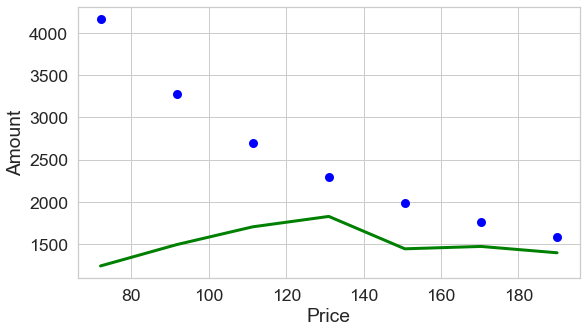

In [16]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[0, 1:].values,color = 'green', linewidth = 3, label = 'Price_rice')
ax.scatter(g1_overall_info.iloc[2, 1:].values, g1_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Price_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')

ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

#plt.legend()
plt.plot()

#  Гиффен 2

In [17]:
data2 = pd.read_excel('Data_2.xlsx', sheet_name = 0)
description2 = pd.read_excel('Data_2.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data2 = data2[usefull_cols].copy()

In [19]:
description2

,Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Таблица с общими результатами
0,participant.id_in_session,NaN,NaN,NaN,Номер игрока
1,participant.code,NaN,NaN,NaN,NaN
2,participant.label,NaN,NaN,NaN,NaN
3,participant._is_bot,NaN,NaN,NaN,-
4,participant.payoff,NaN,NaN,NaN,Общий выигрыш
5,player.id_in_group,NaN,NaN,NaN,Номер в группе (для данной игры совпадает с но...
6,player.role,NaN,NaN,NaN,-
7,player.payoff,NaN,NaN,NaN,Выигрыш в этом периоде - исходный
8,player.x_rice,NaN,NaN,NaN,"Количество риса, заявленное на покупку игроком"
9,player.x_rice_d,NaN,NaN,NaN,"Количество риса, заявленное на покупку игроком..."


In [20]:
g2_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                       'round_6', 'round_7'])
g2_overall_info.loc[0, 'label'] = 'Average_rice'
g2_overall_info.loc[1, 'label'] = 'Average_meat'
g2_overall_info.loc[2, 'label'] = 'Price_rice'
g2_overall_info.loc[3, 'label'] = 'Price_meat'
g2_overall_info.loc[4, 'label'] = short_data.iloc[0:23]['participant.label'].values
g2_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_data2 = short_data2.loc[(short_data2['subsession.round_number'] == round_num)]

    g2_overall_info.iloc[0, round_num] = GetAverageInfo(period_data2, round_num)[0] 
    g2_overall_info.iloc[1, round_num] = GetAverageInfo(period_data2, round_num)[1] 
    g2_overall_info.iloc[2, round_num] = GetAverageInfo(period_data2, round_num)[2] 
    g2_overall_info.iloc[3, round_num] = GetAverageInfo(period_data2, round_num)[3]
    g2_overall_info.iloc[4, round_num] = period_data2['player.payoff'].values
    g2_overall_info.iloc[5, round_num] = GetAverageInfo(period_data2, round_num)[4]

[]

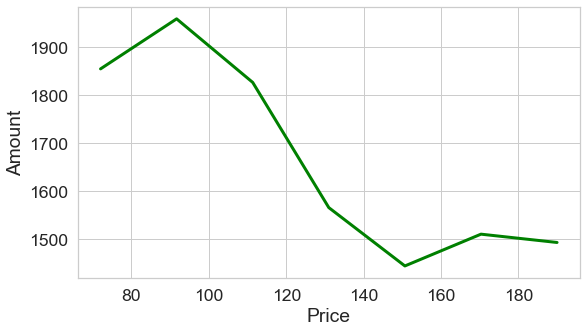

In [21]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g2_overall_info.iloc[2, 1:].values, g2_overall_info.iloc[0, 1:].values,color = 'green', linewidth = 3, label = 'Price_rice')
#ax.scatter(g2_overall_info.iloc[2, 1:].values, g2_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Price_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')

ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

#plt.legend()
plt.plot()

C:\Users\Natalia\AppData\Local\Temp/ipykernel_8284/1780957012.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12, 6))


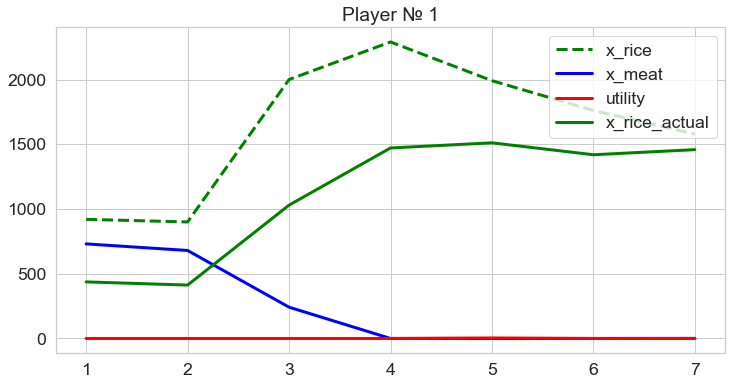

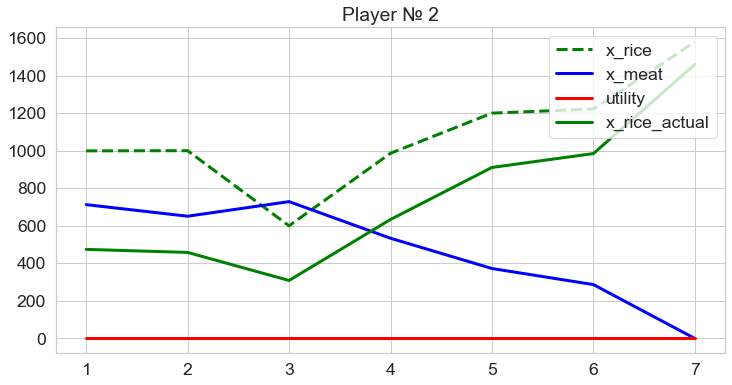

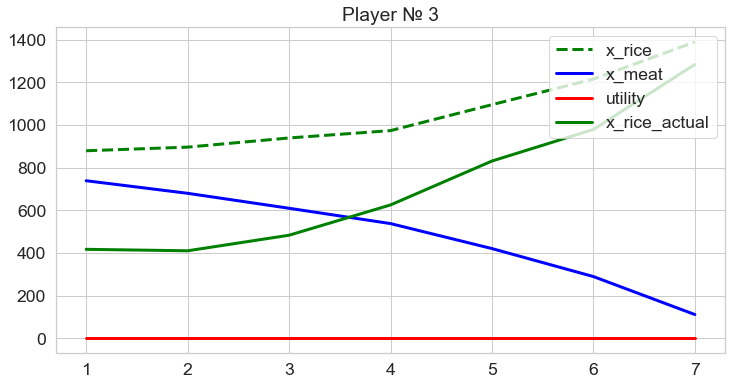

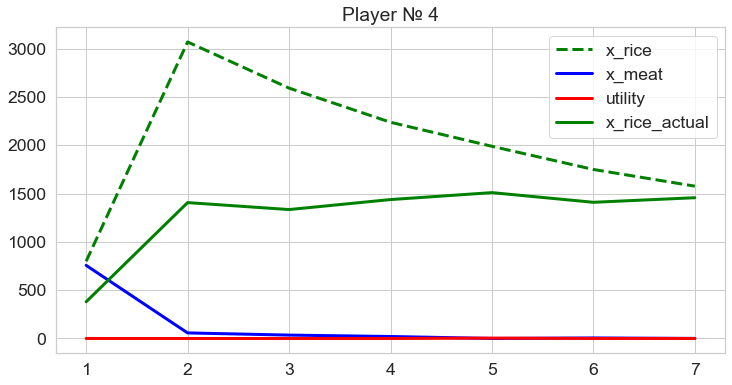

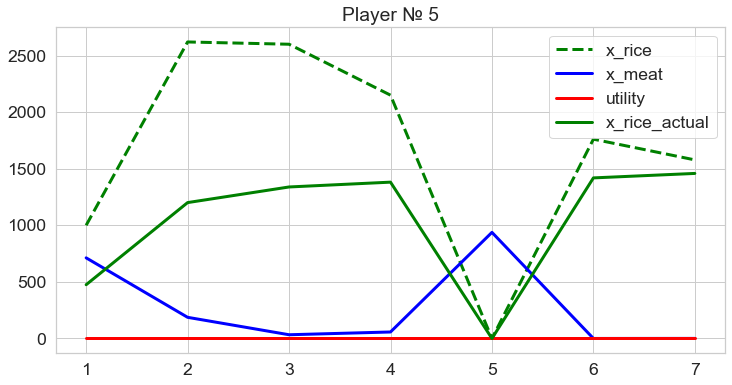

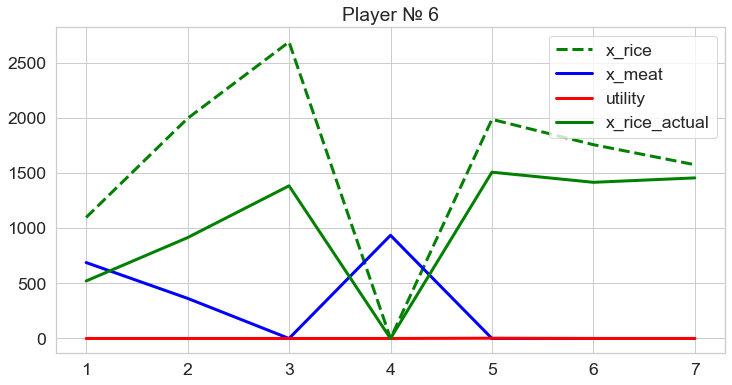

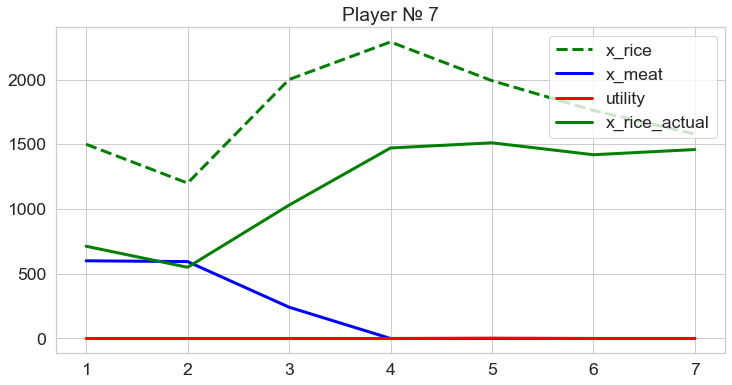

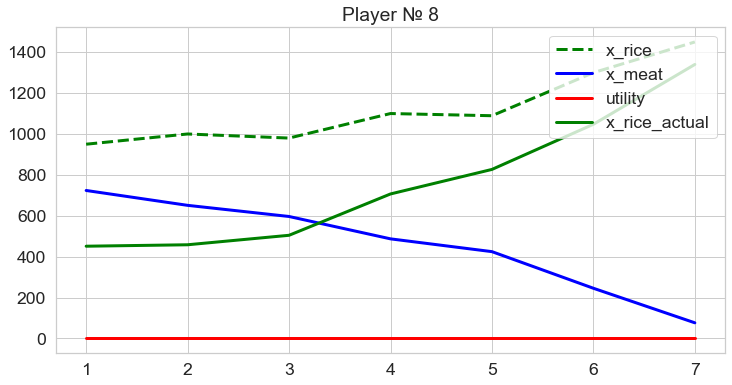

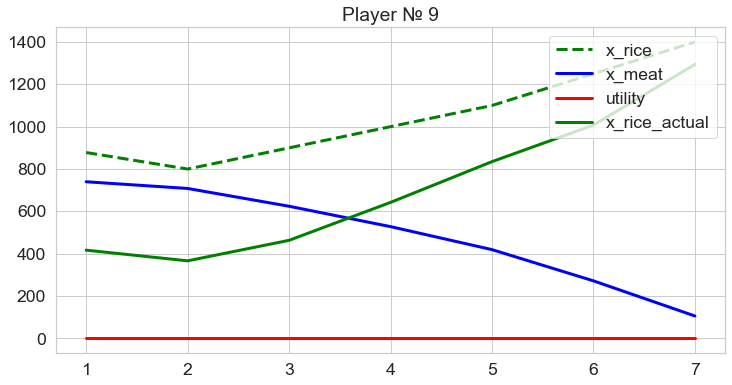

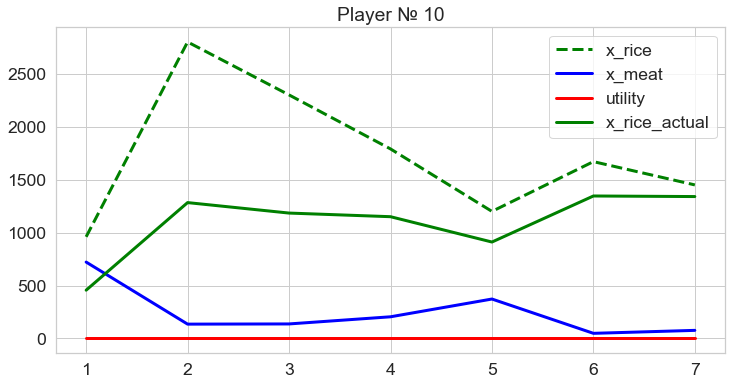

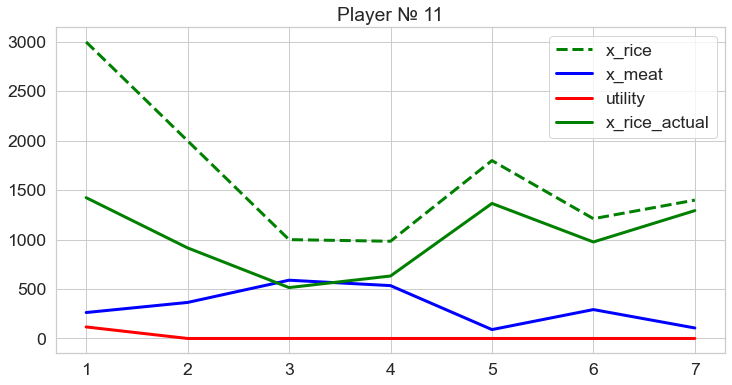

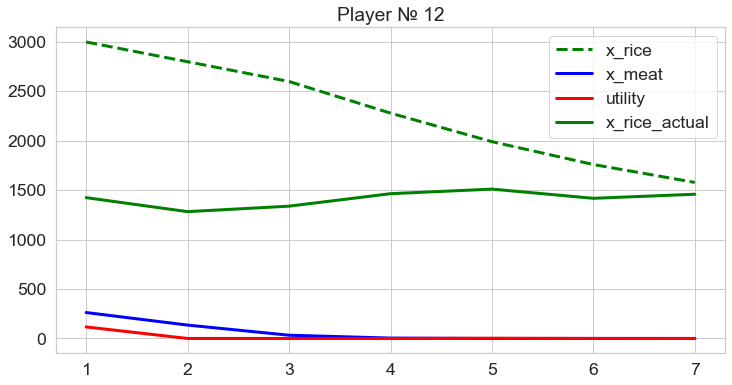

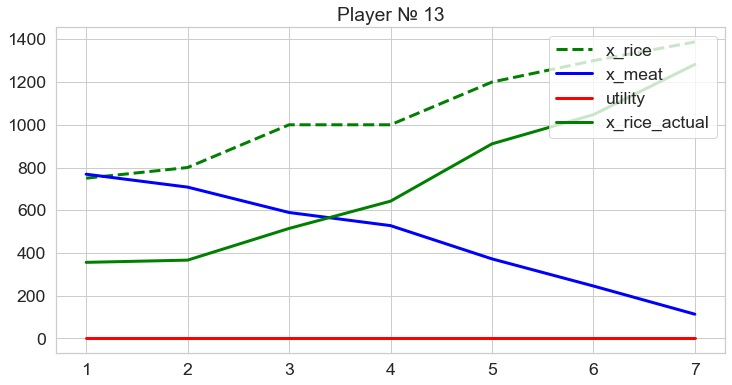

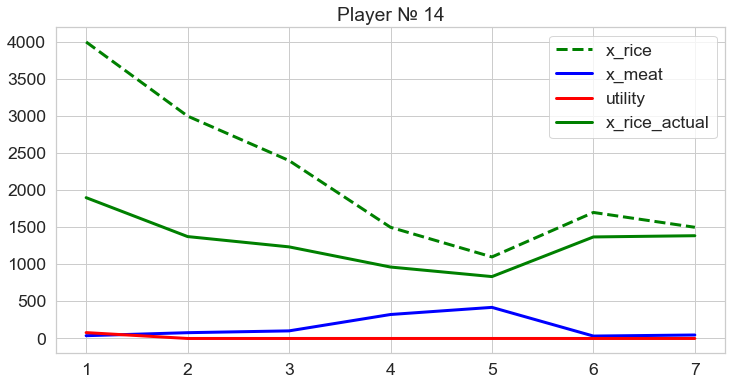

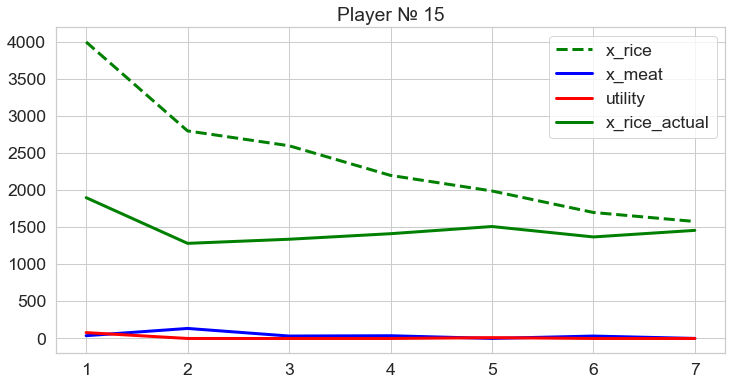

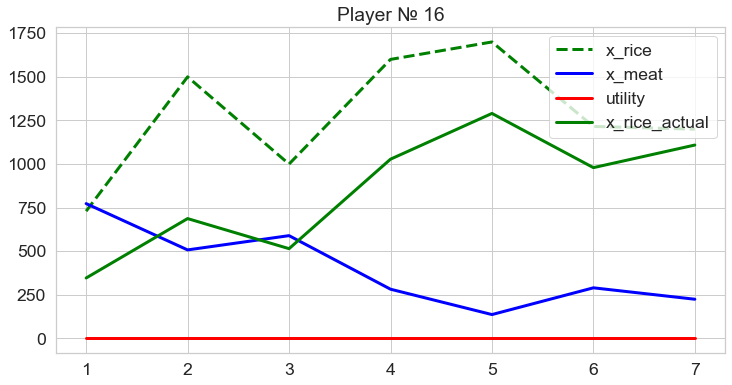

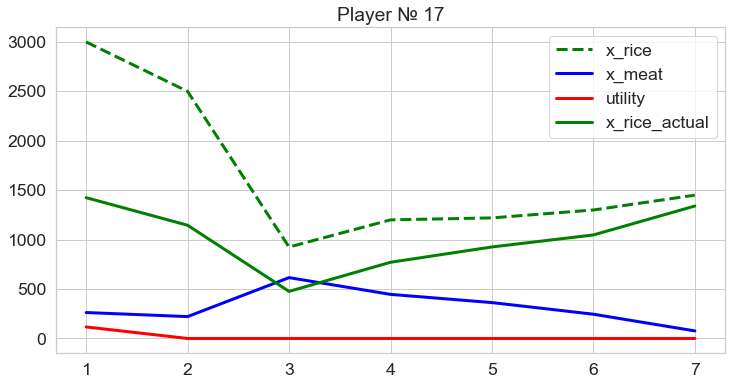

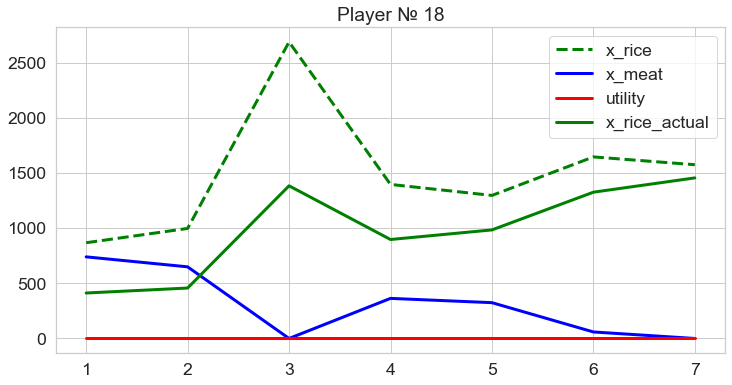

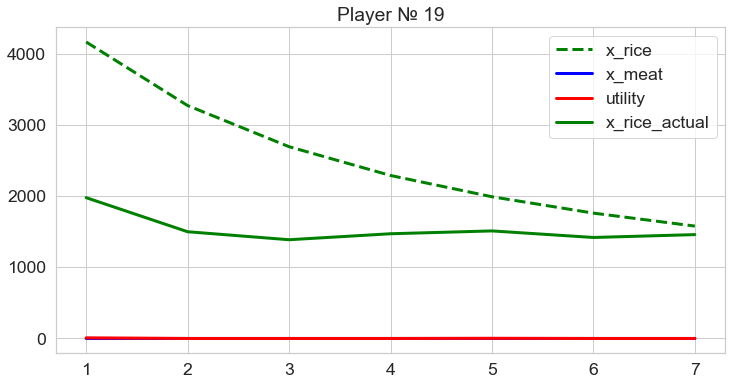

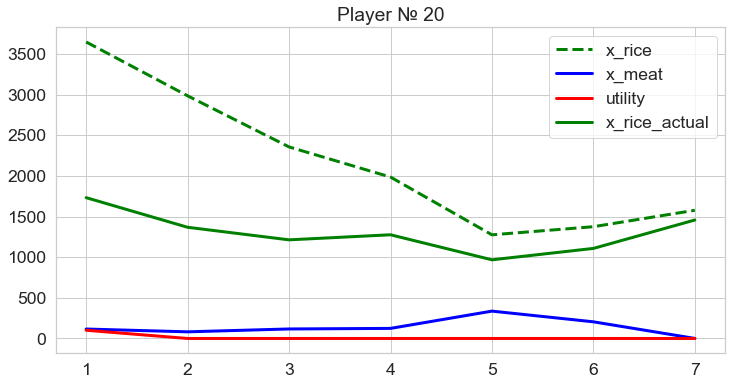

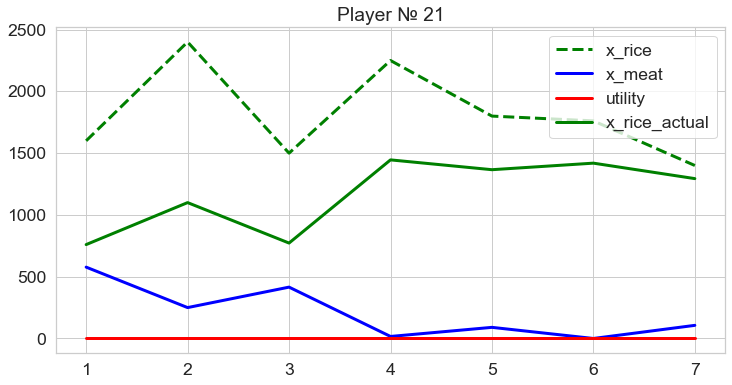

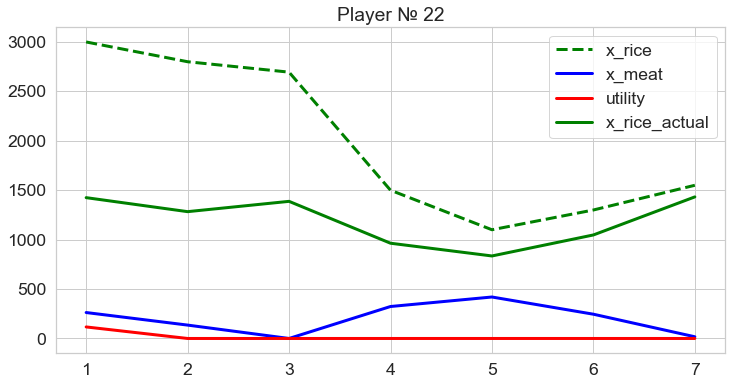

In [41]:
for person_num in range(1, 23):
    PlotForPlayer(data2, person_num, 1)

#  Гиффен 3

In [25]:
data3 = pd.read_excel('Data_3.xlsx', sheet_name = 0)
description3 = pd.read_excel('Data_3.xlsx', sheet_name = 1)
usefull_cols = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data3 = data3[usefull_cols].copy()

In [30]:
g3_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                       'round_6', 'round_7'])
g3_overall_info.loc[0, 'label'] = 'Average_rice'
g3_overall_info.loc[1, 'label'] = 'Average_meat'
g3_overall_info.loc[2, 'label'] = 'Price_rice'
g3_overall_info.loc[3, 'label'] = 'Price_meat'
g3_overall_info.loc[4, 'label'] = short_data3.iloc[0:23]['participant.label'].values
g3_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_data3 = short_data3.loc[(short_data3['subsession.round_number'] == round_num)]

    g3_overall_info.iloc[0, round_num] = GetAverageInfo(period_data3, round_num)[0] 
    g3_overall_info.iloc[1, round_num] = GetAverageInfo(period_data3, round_num)[1] 
    g3_overall_info.iloc[2, round_num] = GetAverageInfo(period_data3, round_num)[2] 
    g3_overall_info.iloc[3, round_num] = GetAverageInfo(period_data3, round_num)[3]
    g3_overall_info.iloc[4, round_num] = period_data3['player.payoff'].values
    g3_overall_info.iloc[5, round_num] = GetAverageInfo(period_data3, round_num)[4]

[]

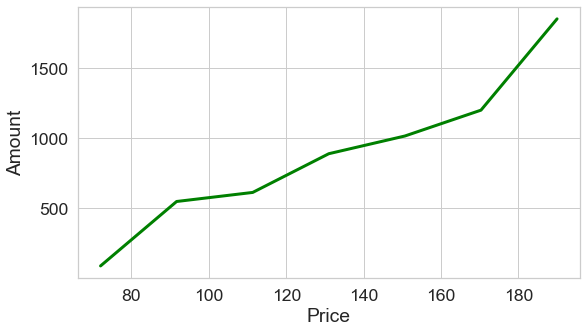

In [31]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g3_overall_info.iloc[2, 1:].values, g3_overall_info.iloc[0, 1:].values,color = 'green', linewidth = 3, label = 'Price_rice')
#ax.scatter(g2_overall_info.iloc[2, 1:].values, g2_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Price_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')

ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

#plt.legend()
plt.plot()

#  Гиффен 4

In [32]:
data4 = pd.read_excel('Data_4.xlsx', sheet_name = 0)
description4 = pd.read_excel('Data_4.xlsx', sheet_name = 1)
usefull_cols4 = ['participant.id_in_session', 'participant.label', 'participant.payoff','player.id_in_group',
                'player.payoff', 'player.x_rice', 'player.x_rice_d', 'player.max_rice', 'player.x_meat',
                'player.utility', 'player.utility_d', 'player.result', 'player.result_d', 'group.p_meat',
                'group.p_rice', 'group.p_rice_d', 'group.eq_rice', 'subsession.round_number']
short_data4 = data4[usefull_cols4].copy()

In [33]:
description4

,Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Таблица с общими результатами
0,participant.id_in_session,NaN,NaN,NaN,Номер игрока
1,participant.code,NaN,NaN,NaN,NaN
2,participant.label,NaN,NaN,NaN,NaN
3,participant._is_bot,NaN,NaN,NaN,-
4,participant.payoff,NaN,NaN,NaN,Общий выигрыш
5,player.id_in_group,NaN,NaN,NaN,Номер в группе (для данной игры совпадает с но...
6,player.role,NaN,NaN,NaN,-
7,player.payoff,NaN,NaN,NaN,Выигрыш в этом периоде - исходный
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [34]:
description | 11

TypeError: Cannot perform 'or_' with a dtyped [float64] array and scalar of type [bool]

In [35]:
по каждому человеку

SyntaxError: invalid syntax (Temp/ipykernel_2548/3021823476.py, line 1)

In [38]:
g4_overall_info = pd.DataFrame(index = range(8), columns=['label', 'round_1', 'round_2', 'round_3', 'round_4', 'round_5',
                                                  'round_6', 'round_7'])
g4_overall_info.loc[0, 'label'] = 'Average_rice'
g4_overall_info.loc[1, 'label'] = 'Average_meat'
g4_overall_info.loc[2, 'label'] = 'Price_rice'
g4_overall_info.loc[3, 'label'] = 'Price_meat'
g4_overall_info.loc[4, 'label'] = short_data4.iloc[0:23]['participant.label'].values
g4_overall_info.loc[5, 'label'] = 'Max_amount_rice'

for round_num in range(1, 8):
    period_data4 = short_data4.loc[(short_data4['subsession.round_number'] == round_num)]

    g4_overall_info.iloc[0, round_num] = GetAverageInfo(period_data4, round_num)[0] 
    g4_overall_info.iloc[1, round_num] = GetAverageInfo(period_data4, round_num)[1] 
    g4_overall_info.iloc[2, round_num] = GetAverageInfo(period_data4, round_num)[2] 
    g4_overall_info.iloc[3, round_num] = GetAverageInfo(period_data4, round_num)[3]
    g4_overall_info.iloc[4, round_num] = period_data4['player.payoff'].values
    g4_overall_info.iloc[5, round_num] = GetAverageInfo(period_data4, round_num)[4]

[]

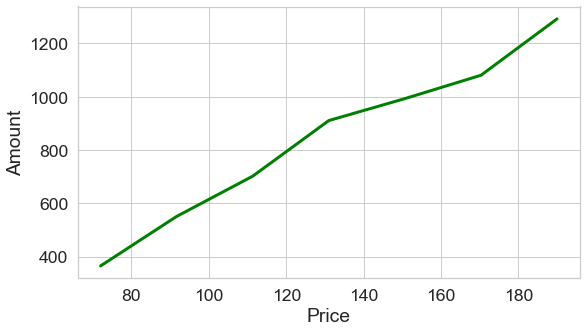

In [39]:
fig, ax = plt.subplots(1, figsize=(9, 5))

ax.plot(g4_overall_info.iloc[2, 1:].values, g4_overall_info.iloc[0, 1:].values,color = 'green', linewidth = 3, label = 'Price_rice')
#ax.scatter(g2_overall_info.iloc[2, 1:].values, g2_overall_info.iloc[5, 1:].values, color = 'blue', linewidth = 3, label = 'Price_rice')

#ax.plot(overall_info.iloc[1, 1:].values, overall_info.iloc[3, 1:].values, color = 'blue', linewidth = 3,label = 'Price_meat')

ax.set_ylabel(ylabel = 'Amount')
ax.set_xlabel(xlabel = 'Price')

#plt.legend()
plt.plot()